In [59]:
import pandas as pd
import os
import numpy as np



# Data Loading 

In [60]:
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Define the directory where the data files are stored
data_dir = "/kaggle/input/crop-dataset"

# Create a function to load and process the data for a given year
def load_and_process_data(year, data_dir):
    # Initialize an empty dataframe to store the data for the specific year
    data = pd.DataFrame()

    # Get the list of files for the specified year
    year_folder = str(year)

    files = os.listdir(os.path.join(data_dir, year_folder))
    
    # Load data from each file in the folder
    for filename in files:
        if filename.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(data_dir, year_folder, filename))
            
            # Add 'Year' and 'CropType' to the dataframe
            base_name = filename.split('.')[0]
            croptype = base_name.rsplit('202', 1)[0]  # Assuming the 'CropType' is before '202'
            df['Year'] = year
            df['CropType'] = croptype
            
            # Append to the main dataframe
            data = pd.concat([data, df], ignore_index=True)
    

    return data



In [61]:
# Process data for 2021, 2022, and 2023
data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)



print("Data processing complete")

Data processing complete


# Printing each year dataset

In [62]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,rice
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,rice
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,rice
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,rice
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,rice


In [63]:
data_2022.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.442943,0.325107,0.448911,0.698456,1.000000,0.071374,0.714939,0.588107,0.571895,0.787698,0.816302,0.613884,2022,rice
1,0.128122,0.352554,0.533025,0.647528,1.000000,0.052378,0.534581,0.511706,0.562397,0.275249,0.553359,0.565554,2022,rice
2,0.400911,0.406091,0.443299,0.535024,0.978224,0.073414,0.387755,0.484515,0.605432,0.570827,0.636029,0.553675,2022,rice
3,0.390117,0.728009,0.760038,0.786063,1.000000,0.059971,0.555362,0.699239,0.893971,0.942492,0.869822,0.759206,2022,rice
4,0.117680,0.111500,0.102671,0.126739,0.144219,0.077910,0.204507,0.600983,0.762850,0.838978,0.824411,0.738954,2022,rice


In [64]:
data_2023.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,cotton
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,cotton
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,cotton
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,cotton
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,cotton


# Merging all Dataframes

In [65]:
data = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)

# Printing Data

In [66]:
data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,rice
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,rice
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,rice
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,rice
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,rice


Shape of dataframe

In [67]:
data.shape

(33096, 14)

# Description of data

In [68]:
data.describe()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year
count,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000,33096.000000
mean,0.169707,0.178748,0.277215,0.403748,0.581003,0.290108,0.642456,0.647588,0.686337,0.659016,0.582465,0.514245,2022.283841
std,0.142806,0.134044,0.174592,0.213576,0.256870,0.278400,0.237172,0.190390,0.179227,0.184970,0.188682,0.219817,0.634687
min,-0.025448,-0.004479,0.002020,0.021010,-0.022998,-0.400086,-0.008705,-0.063648,0.017911,0.037831,0.033582,0.060553,2021.000000
25%,0.099290,0.101373,0.154178,0.240184,0.391771,0.056970,0.490056,0.553758,0.625702,0.594118,0.497613,0.338845,2022.000000
50%,0.122587,0.130403,0.228637,0.379323,0.586422,0.200801,0.677649,0.695394,0.735276,0.696281,0.612394,0.539759,2022.000000
75%,0.166910,0.195974,0.344748,0.539154,0.785043,0.510926,0.831721,0.777605,0.804136,0.771671,0.702215,0.675081,2023.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023.000000


In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33096 entries, 0 to 33095
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NDVI01    33096 non-null  float64
 1   NDVI02    33096 non-null  float64
 2   NDVI03    33096 non-null  float64
 3   NDVI04    33096 non-null  float64
 4   NDVI05    33096 non-null  float64
 5   NDVI06    33096 non-null  float64
 6   NDVI07    33096 non-null  float64
 7   NDVI08    33096 non-null  float64
 8   NDVI09    33096 non-null  float64
 9   NDVI10    33096 non-null  float64
 10  NDVI11    33096 non-null  float64
 11  NDVI12    33096 non-null  float64
 12  Year      33096 non-null  int64  
 13  CropType  33096 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 3.5+ MB


# Checking for null values

In [70]:
data.isnull().sum()

NDVI01      0
NDVI02      0
NDVI03      0
NDVI04      0
NDVI05      0
NDVI06      0
NDVI07      0
NDVI08      0
NDVI09      0
NDVI10      0
NDVI11      0
NDVI12      0
Year        0
CropType    0
dtype: int64

As we can see above there is no null value so we dont need to go to replace any value here

# One-Hot Encoding and Label Encoding

To train machine learning models, we need to convert string and categorical data into numerical values, as computers cannot understand non-numeric data. There are two common techniques for converting categorical data into numbers:

## 1. One-Hot Encoding
One-Hot Encoding is used when the categories are **nominal** (i.e., there is no meaningful order between them). This method creates new binary columns, where each column represents a category. For example, if a column contains "Yes" and "No", One-Hot Encoding will create two columns, one for "Yes" and one for "No", with binary values (0 or              |

## 2. Label Encoding
Label Encoding is used when the categories are **ordinal** (i.e., there is a meaningful order between them). This method assigns a unique integer to each category ba

s
In our case the feature is yes or no use **One hot encoding**ot Encoding** will be used.
ne hot encoding

In [71]:
data = pd.get_dummies(data,columns=['CropType'], drop_first=True)


In [72]:
data["CropType_rice"]=data["CropType_rice"].astype(int)
data.tail()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
33091,0.331873,0.637595,0.860933,0.936457,0.771076,0.402954,0.884208,0.515337,0.851545,0.908714,0.895963,0.858908,2023,1
33092,0.333794,0.621409,0.841538,0.909154,0.736736,0.384046,0.886665,0.485586,0.846778,0.907973,0.904183,0.876847,2023,1
33093,0.373900,0.618582,0.856424,0.903326,0.781238,0.375578,0.889700,0.532434,0.844510,0.911383,0.905652,0.899614,2023,1
33094,0.349008,0.556529,0.855942,0.925486,0.800000,0.347044,0.895157,0.473819,0.812193,0.904762,0.899269,0.903632,2023,1
33095,0.405556,0.568627,0.856176,0.900609,0.684071,0.255589,0.858092,0.506805,0.800410,0.903994,0.899079,0.914840,2023,1


# Checking Class balance

In [73]:
class_balance = data["CropType_rice"].value_counts()

class_balance

CropType_rice
0    27071
1     6025
Name: count, dtype: int64

As classes are very much unbalanced so we need to apply some technique to balance the classes here

# Mitigating Imbalance

To handle data imbalance, three popular techniques are oversampling, undersampling, and SMOTE. 
**Oversampling** 

increases the minority class samples by duplicating or creating new ones, ensuring all classes have equal representation, but it can lead to overfitting. 

**Undersampling**

reduces the majority class by randomly removing samples, balancing the dataset but risking loss of valuable information.

**SMOTE** 

(Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class by interpolating between existing samples, maintaining the dataset's diversity while balancing it. These methods are chosen based on the dataset size, model sensitivity, and the need to preserve data characteristics. SMOTE is often preferred for its ability to avoid duplication and maintain meaningful synthetic patterns.
Resampling Should Be Done Before Scaling
Resampling Techniques:

In [74]:
X = data.drop(columns=["CropType_rice"])  # Features
y = data["CropType_rice"]  # Target variable


# Oversampling

In [78]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
oversampled_data = pd.DataFrame(X_oversampled, columns=X.columns)
oversampled_data["CropType_rice"] = y_oversampled


In [79]:
oversampled_data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [80]:
oversampled_data["CropType_rice"].value_counts()

CropType_rice
1    27071
0    27071
Name: count, dtype: int64

# UnderSampling

In [81]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
undersampled_data = pd.DataFrame(X_undersampled, columns=X.columns)
undersampled_data["CropType_rice"] = y_undersampled

In [103]:
undersampled_data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
15214,0.117337,0.273992,0.268149,0.548470,1.000000,0.832440,0.898840,0.828042,0.828024,0.757594,0.684573,0.637016,2022,0
32049,0.093453,0.098563,0.313694,0.640468,0.633192,0.666739,0.780282,0.761760,0.734252,0.748734,0.701416,0.196822,2023,0
10144,0.091950,0.098503,0.236658,0.385646,0.759036,0.080949,0.659914,0.682338,0.716682,0.629586,0.515419,0.482459,2022,0
8654,0.110544,0.072611,0.183673,0.501558,0.453919,0.523679,0.326877,0.771172,0.790939,0.706749,0.641488,0.534965,2022,0
30923,0.148540,0.199646,0.310780,0.242058,0.455475,0.566485,0.579760,0.516943,0.655678,0.465879,0.294791,0.210379,2023,0


In [83]:
undersampled_data.shape

(12050, 14)

In [84]:
undersampled_data["CropType_rice"].value_counts()

CropType_rice
0    6025
1    6025
Name: count, dtype: int64

# SMOTE

In [87]:
from imblearn.over_sampling import SMOTENC



# Identify categorical columns (here, "Year")
categorical_features = [X.columns.get_loc("Year")]

# Apply SMOTENC (handles categorical features)
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_smote, y_smote = smote_nc.fit_resample(X, y)

smote_data = pd.DataFrame(X_smote, columns=X.columns)
smote_data["CropType_rice"] = y_smote


In [88]:
smote_data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [89]:
smote_data.shape

(54142, 14)

In [91]:
smote_data["CropType_rice"].value_counts()

CropType_rice
1    27071
0    27071
Name: count, dtype: int64

# Scaling

Apply Standard Scaling on all datframes

In [94]:
from sklearn.preprocessing import StandardScaler

def apply_standard_scaling(df, exclude_columns=["CropType_rice", "Year"]):
    """
    Function to apply standard scaling on all numerical columns in the dataframe.
    
    Args:
    - df: DataFrame with features to be scaled.
    - exclude_columns: List of columns to exclude from scaling (e.g., target column or categorical columns).
    
    Returns:
    - Scaled DataFrame with the same columns, excluding the ones from exclude_columns.
    """
    # Identify columns to scale (exclude target and categorical columns)
    columns_to_scale = [col for col in df.columns if col not in exclude_columns]
    
    # Apply StandardScaler to these columns
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_scaled["Year"]=df["Year"]
    df_scaled["CropType_rice"]=df["CropType_rice"]
    
    return df_scaled


In [95]:
undersampled_scaled=apply_standard_scaling(undersampled_data)
oversampled_scaled=apply_standard_scaling(oversampled_data)
smote_scaled=apply_standard_scaling(smote_data)


In [99]:
undersampled_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
15214,-0.443485,0.404170,-0.163161,0.568210,1.565867,2.144455,1.279809,0.996595,0.640978,0.271942,0.209684,0.329245,2022,0
32049,-0.583826,-0.648470,0.045978,0.929671,0.312487,1.526678,0.803221,0.672600,0.154021,0.227484,0.291396,-1.622701,2023,0
10144,-0.592658,-0.648829,-0.307769,-0.071528,0.742496,-0.657312,0.319358,0.284373,0.062778,-0.370349,-0.610929,-0.356104,2022,0
8654,-0.483397,-0.804187,-0.551069,0.383890,-0.300086,0.993308,-1.019411,0.718604,0.448397,0.016824,0.000668,-0.123277,2022,0
30923,-0.260133,-0.041933,0.032595,-0.635685,-0.294769,1.152900,-0.002850,-0.524099,-0.254016,-1.191764,-1.681251,-1.562584,2023,0


In [100]:
oversampled_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,-0.552741,-0.616194,-0.293083,0.290062,-0.392345,0.085861,0.103791,-1.647610,-3.017756,0.381983,0.859679,0.700951,2021,1
1,-0.435145,-0.352831,-0.386994,0.976114,-0.102972,-0.816076,0.491927,0.103100,-2.862615,-2.533034,-1.355413,-1.818904,2021,1
2,-0.067372,-0.355434,-0.343346,0.487251,-0.446685,-0.809380,0.367380,0.269470,-0.541800,-2.556503,-1.306242,-1.869958,2021,1
3,0.162809,-0.372539,-0.482064,1.067789,-0.032357,-0.759407,0.507627,0.058036,-2.578950,-2.468932,-1.964296,-1.745473,2021,1
4,-0.467187,-0.399488,0.503105,0.914641,-0.264126,-0.792251,0.447066,0.143785,-0.609930,-2.510481,-2.100648,-1.791068,2021,1


In [101]:
smote_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,-0.554035,-0.618088,-0.292630,0.294824,-0.389163,0.088519,0.106126,-1.674301,-3.061159,0.381212,0.861968,0.702033,2021,1
1,-0.435140,-0.353747,-0.387121,0.984179,-0.099602,-0.818591,0.497566,0.099732,-2.904213,-2.551315,-1.361097,-1.835364,2021,1
2,-0.063306,-0.356360,-0.343203,0.492963,-0.443538,-0.811857,0.371958,0.268319,-0.556381,-2.574925,-1.311749,-1.886774,2021,1
3,0.169415,-0.373529,-0.482778,1.076297,-0.028942,-0.761598,0.513399,0.054068,-2.617245,-2.486829,-1.972171,-1.761422,2021,1
4,-0.467536,-0.400577,0.508474,0.922410,-0.260860,-0.794630,0.452323,0.140959,-0.625304,-2.528627,-2.109014,-1.807335,2021,1


# Correlation Matrix

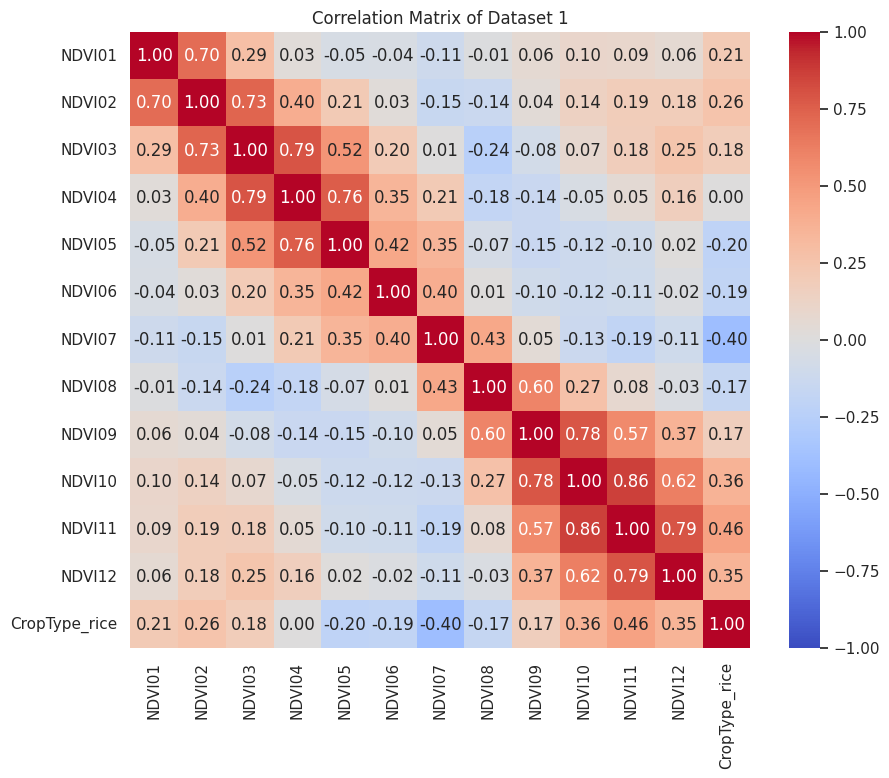

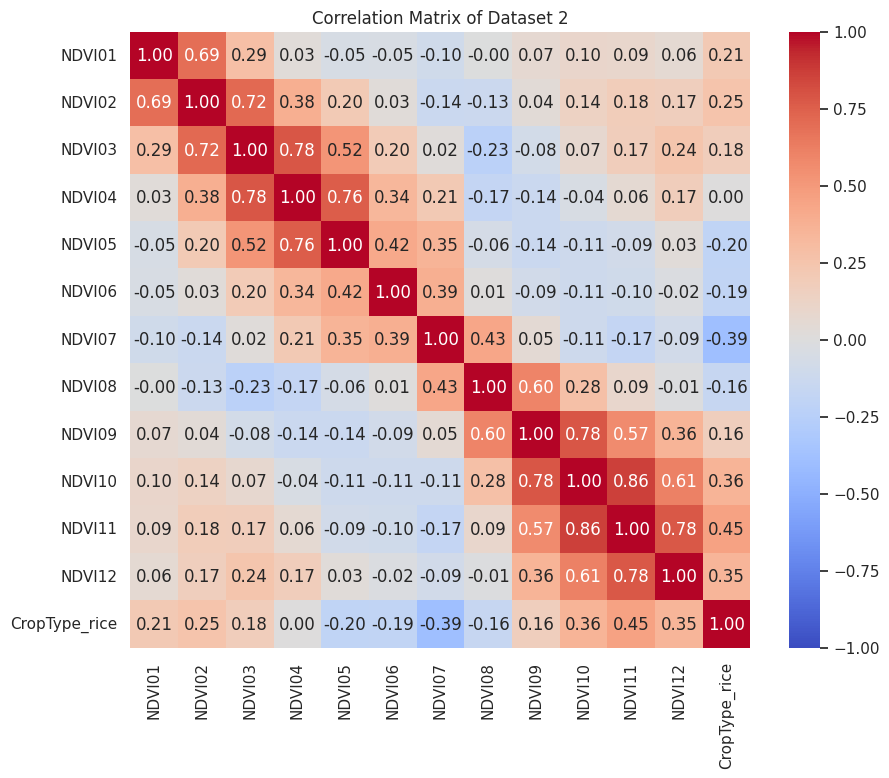

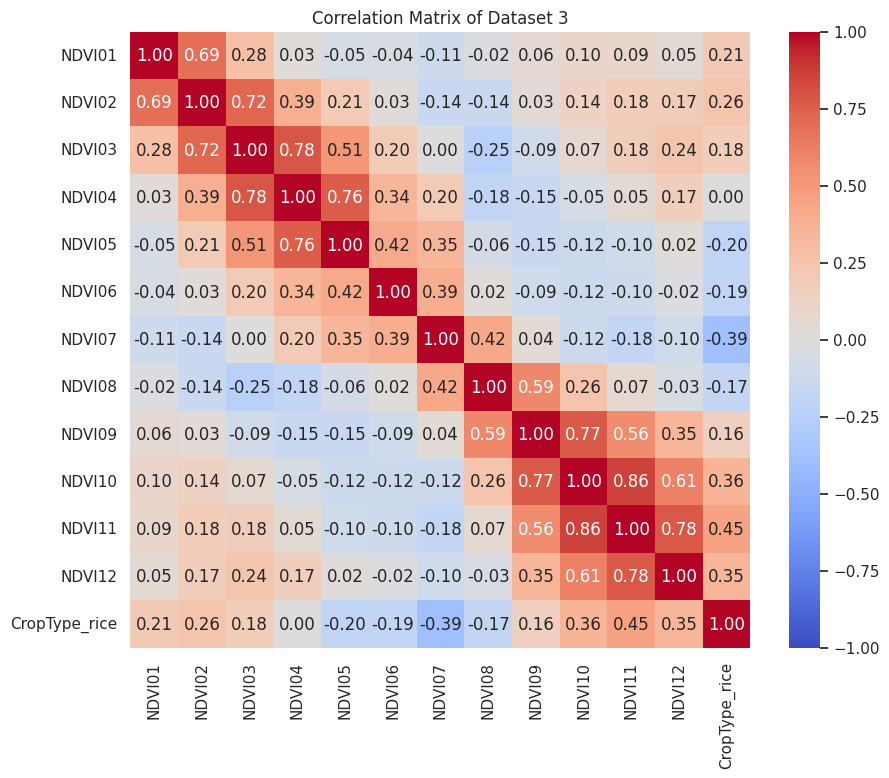

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(*datasets):
    """
    Function to plot the correlation matrix heatmap for multiple datasets.
    
    Args:
    - datasets: Multiple dataframes (e.g., smote_scaled, undersampled_scaled, standardized_data) to plot the correlation matrix for.
    """
    # Loop through each dataset passed to the function
    for idx, df in enumerate(datasets, 1):
        # Calculate the correlation matrix (exclude non-numeric columns like 'CropType' and 'Year')
        correlation_matrix = df.drop(['CropType', 'Year'], axis=1, errors='ignore').corr()
        
        # Create a new figure for each dataset
        plt.figure(figsize=(10, 8))
        
        # Plot the heatmap of the correlation matrix
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix of Dataset {idx}')
        plt.show()

# Example usage:
plot_correlation_matrix(smote_scaled, undersampled_scaled, oversampled_scaled)


# Applying Machine Learning Models to All three datasets

# General function of cross validation

In [122]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Function to perform cross-validation with any given model and add confusion matrix
def cross_validation_report(standardized_data, model):
    """
    Perform cross-validation with the specified model and evaluate performance.
    """
    # Create lists to store results for overall metrics
    all_y_true = []  # List to hold true labels across all folds
    all_y_pred = []  # List to hold predicted labels across all folds
    
    # 1. Train on Year 1 and Year 2, Test on Year 3
    train_data_1_2 = standardized_data[standardized_data['Year'].isin([2021, 2022])]
    test_data_3 = standardized_data[standardized_data['Year'] == 2023]
    
    X_train_1_2 = train_data_1_2.drop(['CropType_rice', 'Year'], axis=1)
    y_train_1_2 = train_data_1_2['CropType_rice']
    X_test_3 = test_data_3.drop(['CropType_rice', 'Year'], axis=1)
    y_test_3 = test_data_3['CropType_rice']
    
    # Train the model and evaluate
    model.fit(X_train_1_2, y_train_1_2)
    y_pred_3 = model.predict(X_test_3)
    
    accuracy_1_2_vs_3 = accuracy_score(y_test_3, y_pred_3)
    print("Accuracy (Train: Year 1 & 2, Test: Year 3):", accuracy_1_2_vs_3)
    print("Classification Report for (Train: Year 1 & 2, Test: Year 3):\n", classification_report(y_test_3, y_pred_3))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_3, y_pred_3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix (Train: Year 1 & 2, Test: Year 3)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Append results to lists for overall metrics
    all_y_true.extend(y_test_3)
    all_y_pred.extend(y_pred_3)

    # 2. Train on Year 1 and Year 3, Test on Year 2
    train_data_1_3 = standardized_data[standardized_data['Year'].isin([2021, 2023])]
    test_data_2 = standardized_data[standardized_data['Year'] == 2022]
    
    X_train_1_3 = train_data_1_3.drop(['CropType_rice', 'Year'], axis=1)
    y_train_1_3 = train_data_1_3['CropType_rice']
    X_test_2 = test_data_2.drop(['CropType_rice', 'Year'], axis=1)
    y_test_2 = test_data_2['CropType_rice']
    
    # Train the model and evaluate
    model.fit(X_train_1_3, y_train_1_3)
    y_pred_2 = model.predict(X_test_2)
    
    accuracy_1_3_vs_2 = accuracy_score(y_test_2, y_pred_2)
    print("\nAccuracy (Train: Year 1 & 3, Test: Year 2):", accuracy_1_3_vs_2)
    print("Classification Report for (Train: Year 1 & 3, Test: Year 2):\n", classification_report(y_test_2, y_pred_2))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_2, y_pred_2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix (Train: Year 1 & 3, Test: Year 2)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Append results to lists for overall metrics
    all_y_true.extend(y_test_2)
    all_y_pred.extend(y_pred_2)

    # 3. Train on Year 2 and Year 3, Test on Year 1
    train_data_2_3 = standardized_data[standardized_data['Year'].isin([2022, 2023])]
    test_data_1 = standardized_data[standardized_data['Year'] == 2021]
    
    X_train_2_3 = train_data_2_3.drop(['CropType_rice', 'Year'], axis=1)
    y_train_2_3 = train_data_2_3['CropType_rice']
    X_test_1 = test_data_1.drop(['CropType_rice', 'Year'], axis=1)
    y_test_1 = test_data_1['CropType_rice']
    
    # Train the model and evaluate
    model.fit(X_train_2_3, y_train_2_3)
    y_pred_1 = model.predict(X_test_1)
    
    accuracy_2_3_vs_1 = accuracy_score(y_test_1, y_pred_1)
    print("\nAccuracy (Train: Year 2 & 3, Test: Year 1):", accuracy_2_3_vs_1)
    print("Classification Report for (Train: Year 2 & 3, Test: Year 1):\n", classification_report(y_test_1, y_pred_1))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_1, y_pred_1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix (Train: Year 2 & 3, Test: Year 1)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Append results to lists for overall metrics
    all_y_true.extend(y_test_1)
    all_y_pred.extend(y_pred_1)

    # Calculate overall metrics
    overall_accuracy = accuracy_score(all_y_true, all_y_pred)
    overall_precision = precision_score(all_y_true, all_y_pred, average='weighted')
    overall_recall = recall_score(all_y_true, all_y_pred, average='weighted')
    overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')

    print("\nOverall Metrics:")
    print(f"Overall Accuracy: {overall_accuracy:.4f}")
    print(f"Overall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")
    print(f"Overall F1-Score: {overall_f1:.4f}")


# Ensamble Method(XGBOOST)


In [124]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=10)




For UnderSampled Data

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8011315417256011
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      2616
           1       0.57      0.91      0.70       919

    accuracy                           0.80      3535
   macro avg       0.77      0.84      0.78      3535
weighted avg       0.86      0.80      0.81      3535



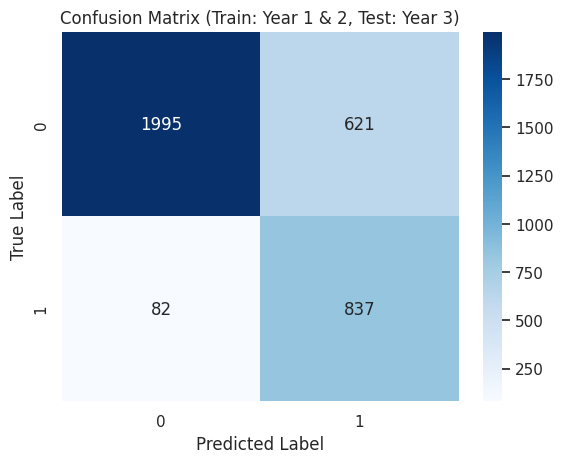


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.7749260951357162
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.63      0.96      0.76      2755
           1       0.96      0.67      0.79      4687

    accuracy                           0.77      7442
   macro avg       0.80      0.81      0.77      7442
weighted avg       0.84      0.77      0.78      7442



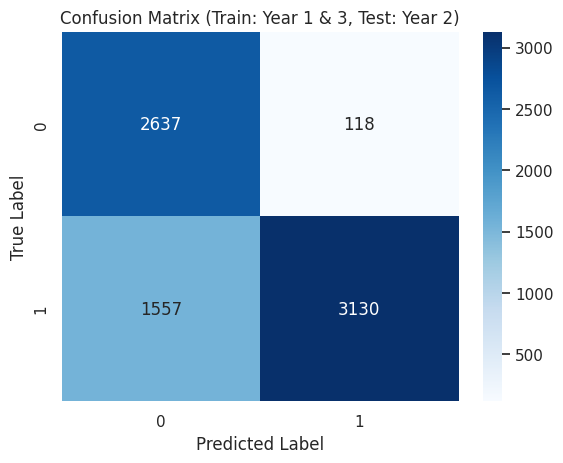


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.8303821062441752
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       654
           1       0.77      0.80      0.79       419

    accuracy                           0.83      1073
   macro avg       0.82      0.83      0.82      1073
weighted avg       0.83      0.83      0.83      1073



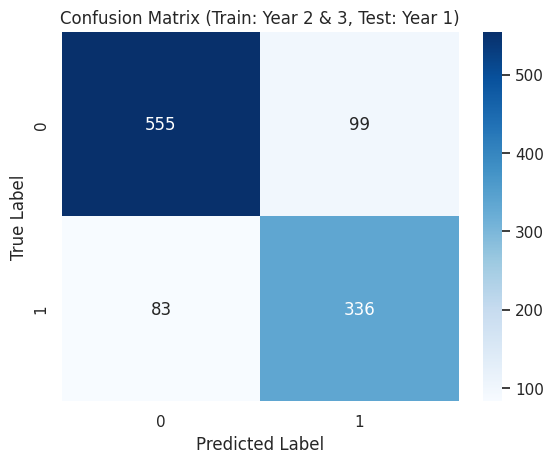


Overall Metrics:
Overall Accuracy: 0.7876
Overall Precision: 0.7939
Overall Recall: 0.7876
Overall F1-Score: 0.7864


In [125]:


cross_validation_report(undersampled_scaled, xgb_model)

For oversampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8471421408874404
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     11777
           1       0.67      0.83      0.74      4179

    accuracy                           0.85     15956
   macro avg       0.80      0.84      0.82     15956
weighted avg       0.86      0.85      0.85     15956



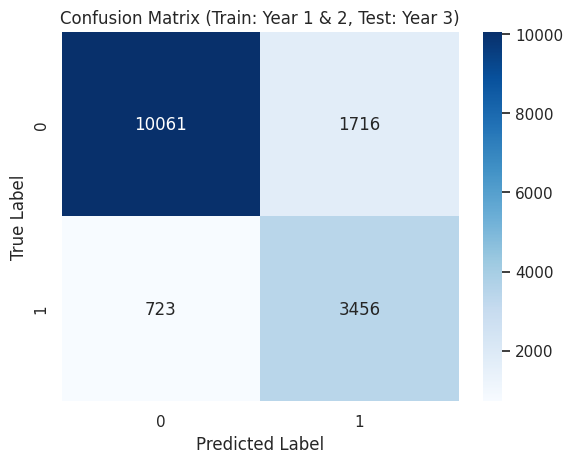


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.6506168045640551
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.52      0.99      0.68     12411
           1       0.98      0.45      0.62     21068

    accuracy                           0.65     33479
   macro avg       0.75      0.72      0.65     33479
weighted avg       0.81      0.65      0.64     33479



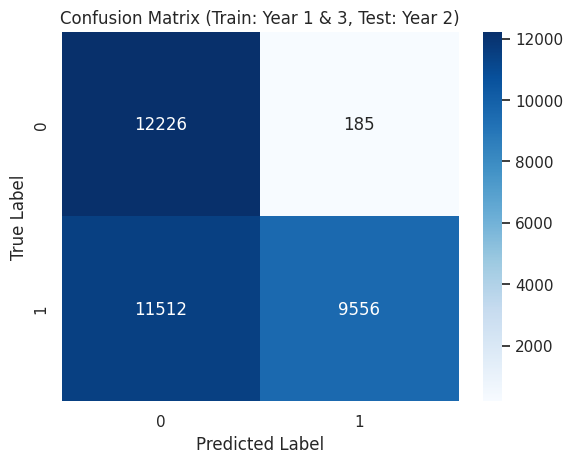


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.810919906522201
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2883
           1       0.84      0.63      0.72      1824

    accuracy                           0.81      4707
   macro avg       0.82      0.78      0.79      4707
weighted avg       0.82      0.81      0.80      4707



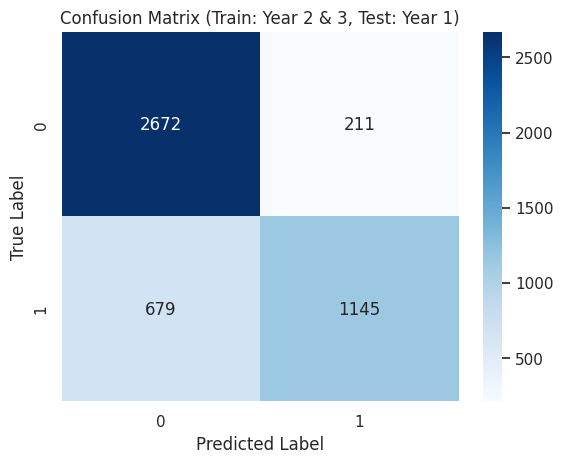


Overall Metrics:
Overall Accuracy: 0.7225
Overall Precision: 0.7646
Overall Recall: 0.7225
Overall F1-Score: 0.7110


In [126]:


cross_validation_report(oversampled_scaled, xgb_model)

SMOTE Data

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.833322762732289
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.95      0.82      0.88     11777
           1       0.62      0.87      0.73      3990

    accuracy                           0.83     15767
   macro avg       0.79      0.85      0.80     15767
weighted avg       0.87      0.83      0.84     15767



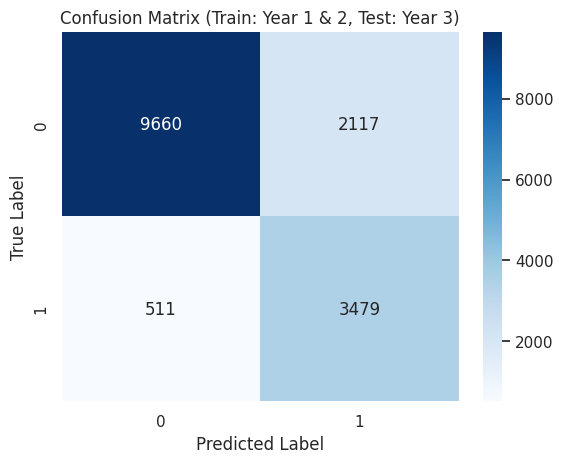


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.6698208353108686
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.53      0.98      0.69     12411
           1       0.97      0.49      0.65     21301

    accuracy                           0.67     33712
   macro avg       0.75      0.73      0.67     33712
weighted avg       0.81      0.67      0.66     33712



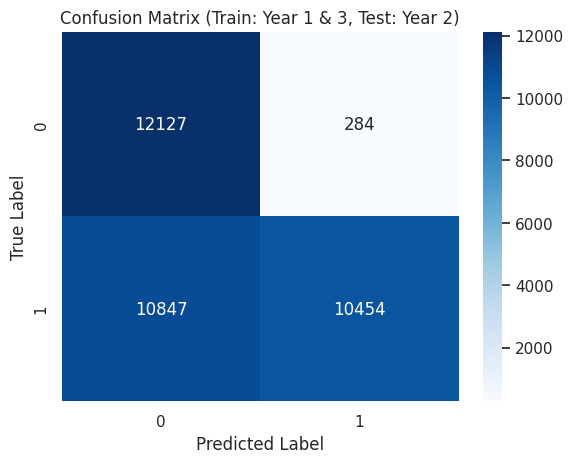


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.8436628779755522
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      2883
           1       0.81      0.77      0.79      1780

    accuracy                           0.84      4663
   macro avg       0.84      0.83      0.83      4663
weighted avg       0.84      0.84      0.84      4663



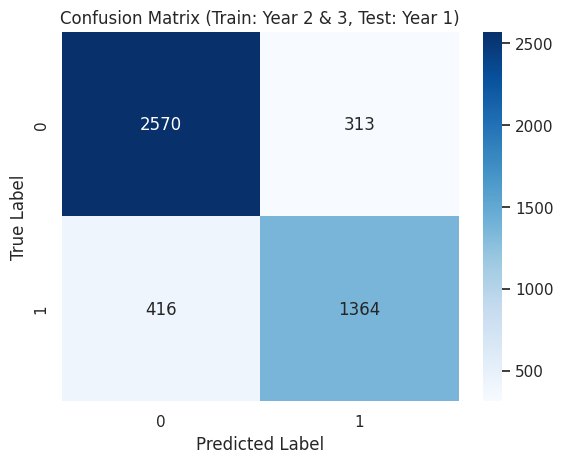


Overall Metrics:
Overall Accuracy: 0.7324
Overall Precision: 0.7617
Overall Recall: 0.7324
Overall F1-Score: 0.7247


In [127]:


cross_validation_report(smote_scaled, xgb_model)

# Bagging

In [132]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base learner (Decision Tree Classifier)
base_model = DecisionTreeClassifier(max_depth=5)
bagging_model = BaggingClassifier(estimator=base_model,
                                 n_estimators=50,  
                                 random_state=42)

Undersampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8014144271570014
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      2616
           1       0.58      0.90      0.70       919

    accuracy                           0.80      3535
   macro avg       0.77      0.83      0.78      3535
weighted avg       0.86      0.80      0.81      3535



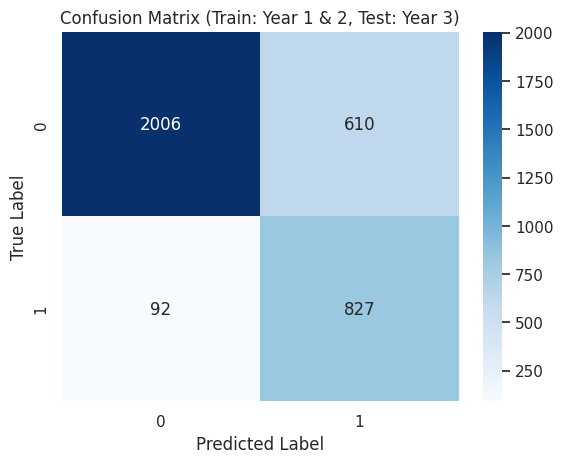


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.748723461435098
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.60      0.97      0.74      2755
           1       0.97      0.62      0.76      4687

    accuracy                           0.75      7442
   macro avg       0.79      0.79      0.75      7442
weighted avg       0.83      0.75      0.75      7442



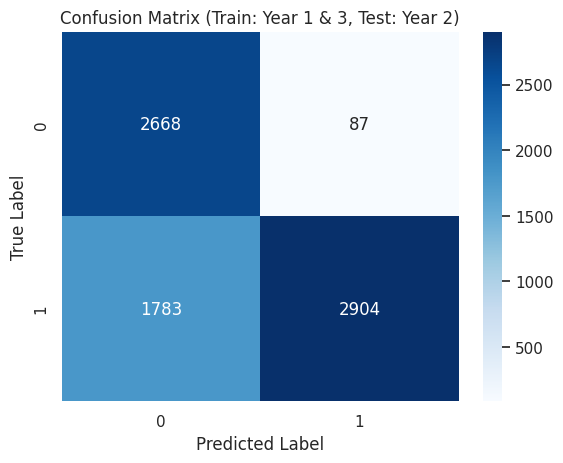


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.700838769804287
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       654
           1       0.62      0.60      0.61       419

    accuracy                           0.70      1073
   macro avg       0.69      0.68      0.68      1073
weighted avg       0.70      0.70      0.70      1073



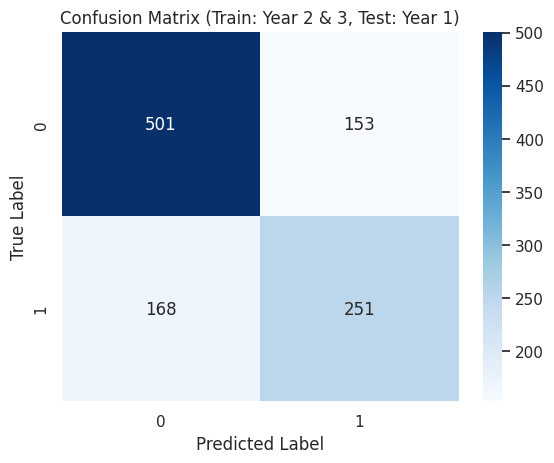


Overall Metrics:
Overall Accuracy: 0.7599
Overall Precision: 0.7705
Overall Recall: 0.7599
Overall F1-Score: 0.7575


In [133]:


cross_validation_report(undersampled_scaled, bagging_model)

OverSampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8087239909751818
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.77      0.86     11777
           1       0.59      0.91      0.71      4179

    accuracy                           0.81     15956
   macro avg       0.77      0.84      0.78     15956
weighted avg       0.86      0.81      0.82     15956



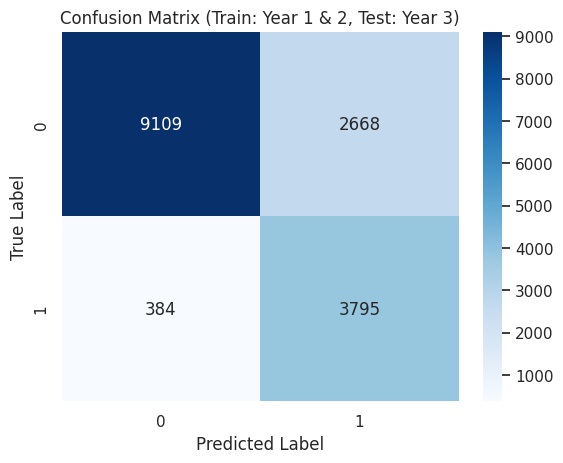


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.7315331999163655
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.58      0.98      0.73     12411
           1       0.98      0.59      0.73     21068

    accuracy                           0.73     33479
   macro avg       0.78      0.78      0.73     33479
weighted avg       0.83      0.73      0.73     33479



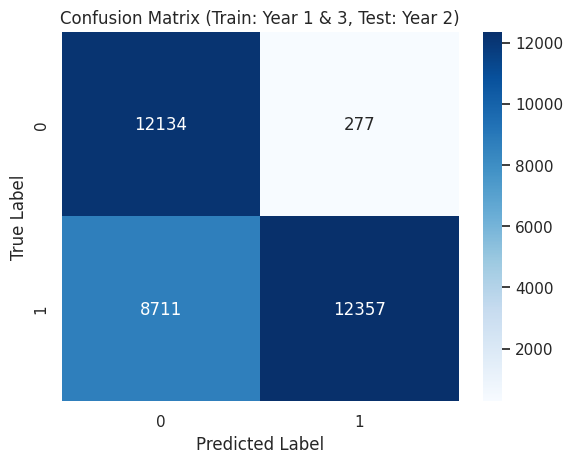


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.7021457403866582
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      2883
           1       0.62      0.59      0.60      1824

    accuracy                           0.70      4707
   macro avg       0.69      0.68      0.68      4707
weighted avg       0.70      0.70      0.70      4707



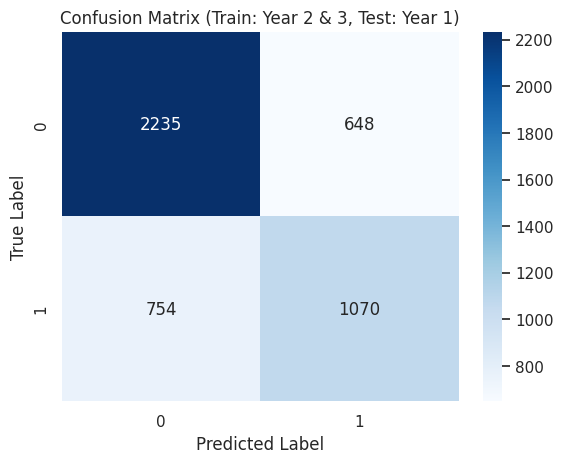


Overall Metrics:
Overall Accuracy: 0.7517
Overall Precision: 0.7659
Overall Recall: 0.7517
Overall F1-Score: 0.7484


In [134]:
cross_validation_report(oversampled_scaled, bagging_model)

SMOTE

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8300247352064438
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.81      0.88     11777
           1       0.61      0.90      0.73      3990

    accuracy                           0.83     15767
   macro avg       0.79      0.85      0.80     15767
weighted avg       0.87      0.83      0.84     15767



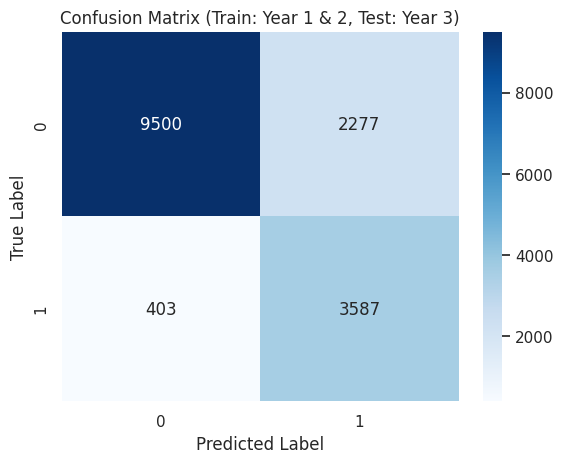


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.7205742762221168
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.57      0.97      0.72     12411
           1       0.97      0.57      0.72     21301

    accuracy                           0.72     33712
   macro avg       0.77      0.77      0.72     33712
weighted avg       0.82      0.72      0.72     33712



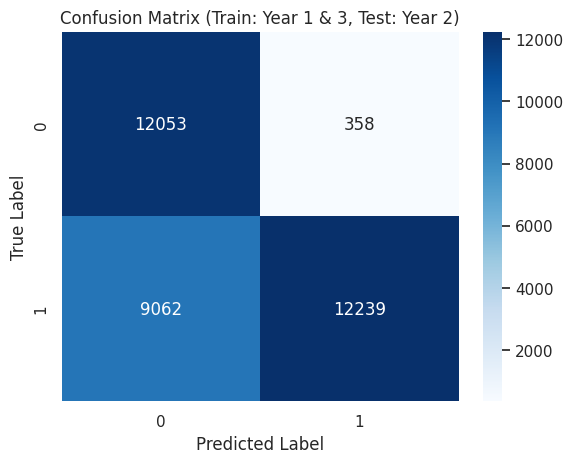


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.7289298734720138
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2883
           1       0.64      0.68      0.66      1780

    accuracy                           0.73      4663
   macro avg       0.71      0.72      0.72      4663
weighted avg       0.73      0.73      0.73      4663



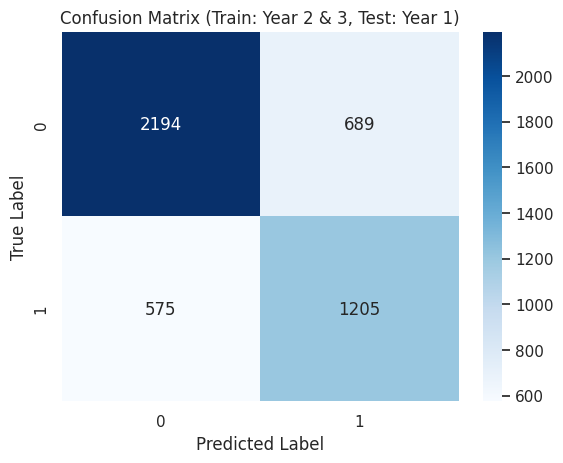


Overall Metrics:
Overall Accuracy: 0.7532
Overall Precision: 0.7698
Overall Recall: 0.7532
Overall F1-Score: 0.7493


In [135]:
cross_validation_report(smote_scaled, bagging_model)

# Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


Undersampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8172560113154173
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      2616
           1       0.59      0.93      0.73       919

    accuracy                           0.82      3535
   macro avg       0.78      0.85      0.79      3535
weighted avg       0.87      0.82      0.83      3535



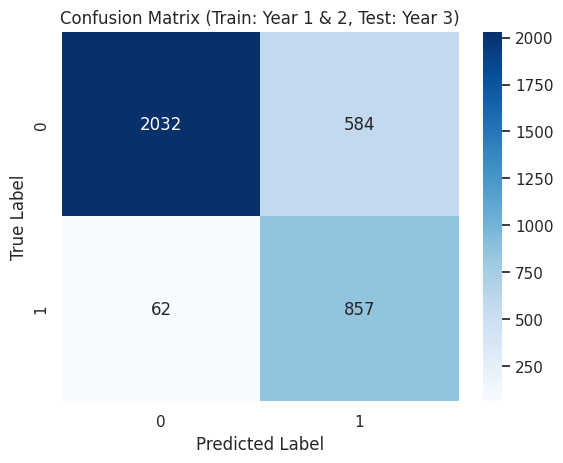


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.8000537489922064
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.65      0.97      0.78      2755
           1       0.98      0.70      0.81      4687

    accuracy                           0.80      7442
   macro avg       0.82      0.84      0.80      7442
weighted avg       0.86      0.80      0.80      7442



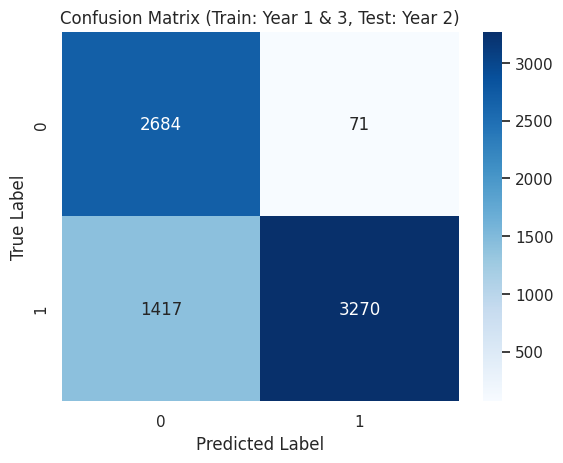


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.7809878844361603
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       654
           1       0.72      0.72      0.72       419

    accuracy                           0.78      1073
   macro avg       0.77      0.77      0.77      1073
weighted avg       0.78      0.78      0.78      1073



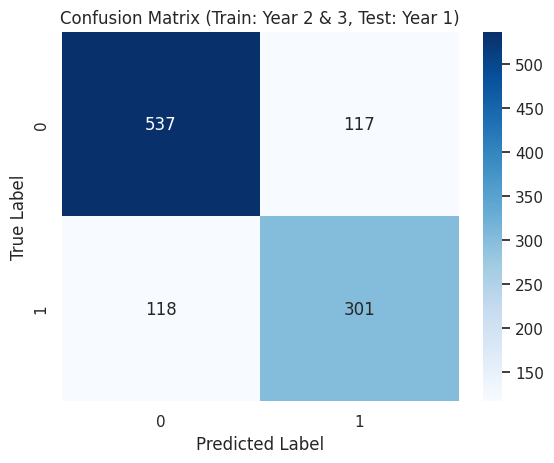


Overall Metrics:
Overall Accuracy: 0.8034
Overall Precision: 0.8092
Overall Recall: 0.8034
Overall F1-Score: 0.8025


In [137]:
cross_validation_report(undersampled_scaled, rf_model)

Oversampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8492103284031085
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     11777
           1       0.66      0.86      0.75      4179

    accuracy                           0.85     15956
   macro avg       0.80      0.85      0.82     15956
weighted avg       0.87      0.85      0.85     15956



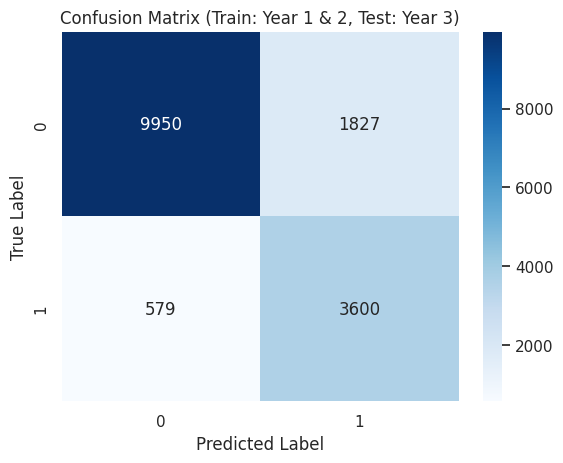


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.672690343200215
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.53      0.99      0.69     12411
           1       0.99      0.49      0.65     21068

    accuracy                           0.67     33479
   macro avg       0.76      0.74      0.67     33479
weighted avg       0.82      0.67      0.67     33479



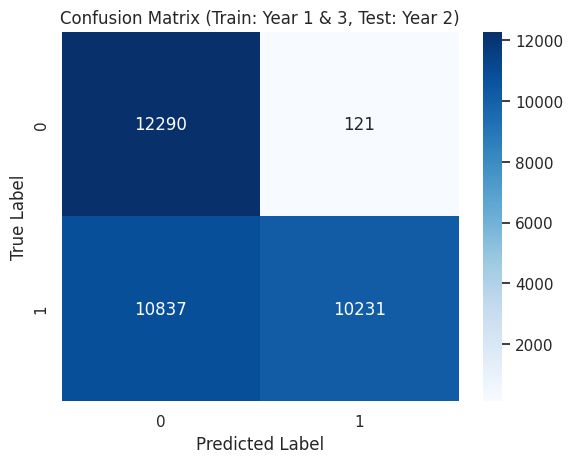


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.78096452092628
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.78      0.90      0.83      2883
           1       0.78      0.60      0.68      1824

    accuracy                           0.78      4707
   macro avg       0.78      0.75      0.76      4707
weighted avg       0.78      0.78      0.77      4707



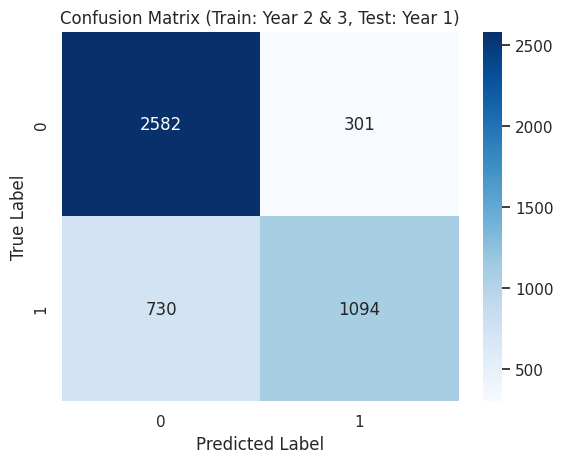


Overall Metrics:
Overall Accuracy: 0.7341
Overall Precision: 0.7702
Overall Recall: 0.7341
Overall F1-Score: 0.7249


In [138]:
cross_validation_report(oversampled_scaled, rf_model)

Smote

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8309126656941713
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     11777
           1       0.62      0.88      0.73      3990

    accuracy                           0.83     15767
   macro avg       0.78      0.85      0.80     15767
weighted avg       0.87      0.83      0.84     15767



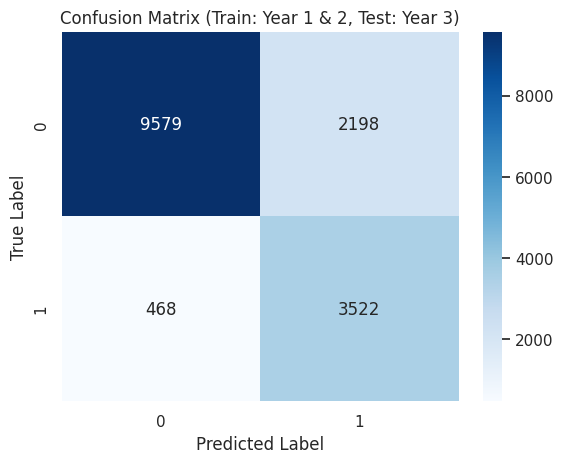


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.6657866635026104
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.52      0.99      0.69     12411
           1       0.99      0.48      0.64     21301

    accuracy                           0.67     33712
   macro avg       0.76      0.73      0.66     33712
weighted avg       0.82      0.67      0.66     33712



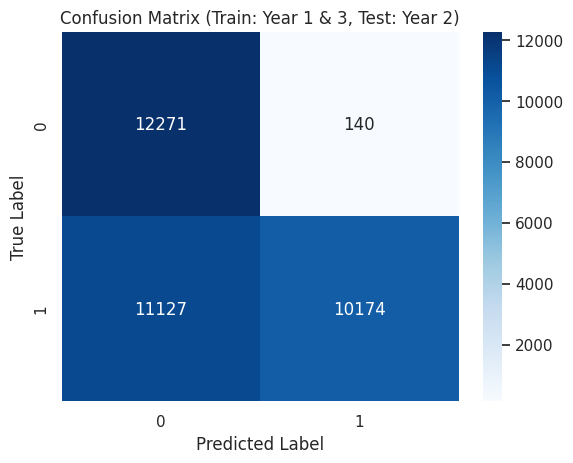


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.7984130388162127
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      2883
           1       0.77      0.67      0.72      1780

    accuracy                           0.80      4663
   macro avg       0.79      0.77      0.78      4663
weighted avg       0.80      0.80      0.80      4663



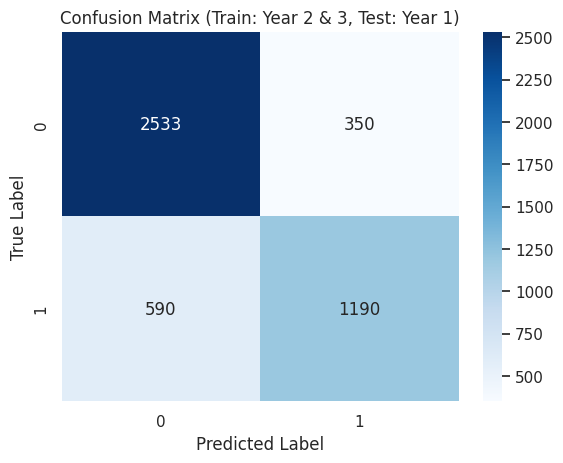


Overall Metrics:
Overall Accuracy: 0.7253
Overall Precision: 0.7569
Overall Recall: 0.7253
Overall F1-Score: 0.7166


In [139]:
cross_validation_report(smote_scaled, rf_model)

# SVM

In [140]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

Undersampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.7997171145685997
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      2616
           1       0.57      0.95      0.71       919

    accuracy                           0.80      3535
   macro avg       0.77      0.85      0.78      3535
weighted avg       0.87      0.80      0.81      3535



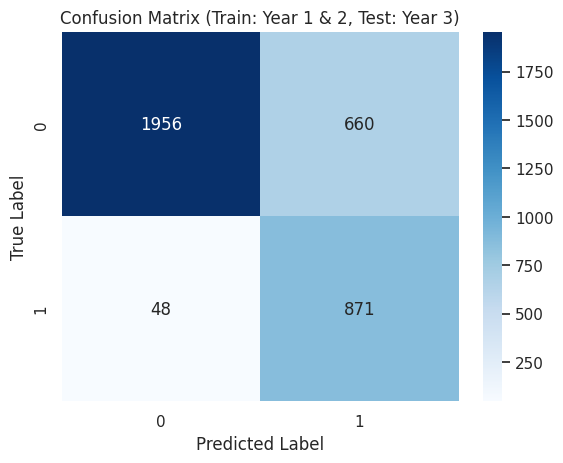


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.7950819672131147
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.66      0.94      0.77      2755
           1       0.95      0.71      0.81      4687

    accuracy                           0.80      7442
   macro avg       0.80      0.82      0.79      7442
weighted avg       0.84      0.80      0.80      7442



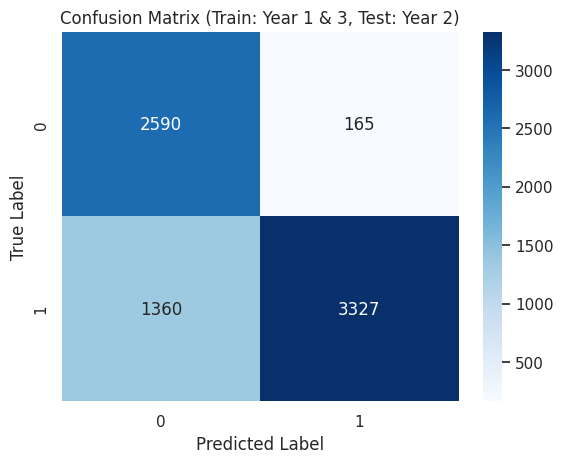


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.8564771668219944
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       654
           1       0.82      0.82      0.82       419

    accuracy                           0.86      1073
   macro avg       0.85      0.85      0.85      1073
weighted avg       0.86      0.86      0.86      1073



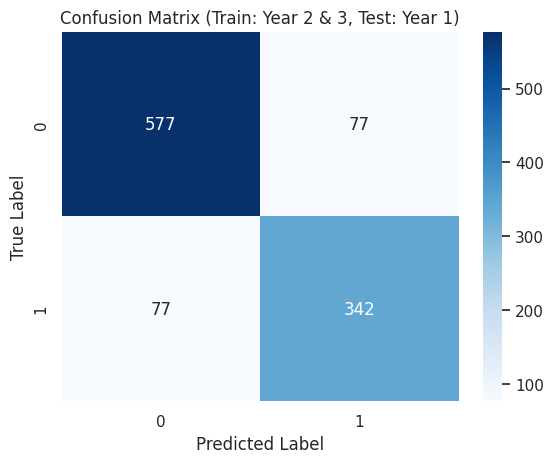


Overall Metrics:
Overall Accuracy: 0.8019
Overall Precision: 0.8048
Overall Recall: 0.8019
Overall F1-Score: 0.8014


In [141]:
cross_validation_report(undersampled_scaled, svm_model)

OverSampled

Accuracy (Train: Year 1 & 2, Test: Year 3): 0.7933065931311105
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.75      0.84     11777
           1       0.57      0.91      0.70      4179

    accuracy                           0.79     15956
   macro avg       0.76      0.83      0.77     15956
weighted avg       0.85      0.79      0.80     15956



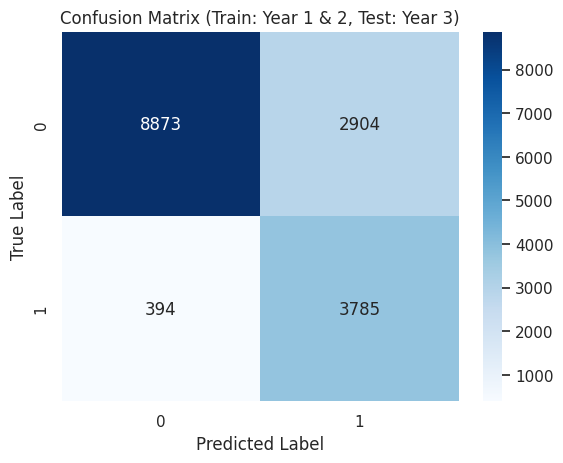


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.7787568326413573
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.64      0.93      0.76     12411
           1       0.95      0.69      0.80     21068

    accuracy                           0.78     33479
   macro avg       0.79      0.81      0.78     33479
weighted avg       0.83      0.78      0.78     33479



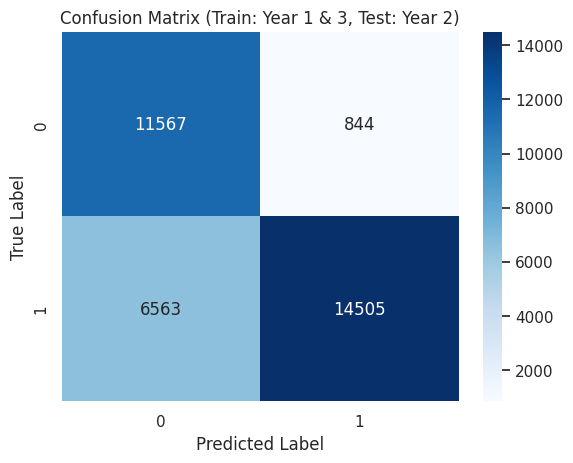


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.8483110261312938
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      2883
           1       0.79      0.82      0.81      1824

    accuracy                           0.85      4707
   macro avg       0.84      0.84      0.84      4707
weighted avg       0.85      0.85      0.85      4707



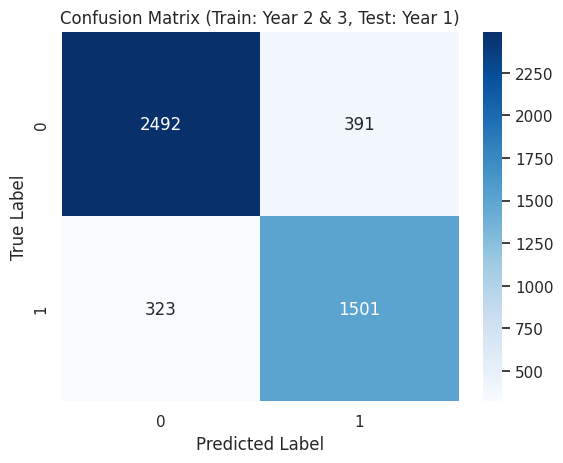


Overall Metrics:
Overall Accuracy: 0.7891
Overall Precision: 0.7930
Overall Recall: 0.7891
Overall F1-Score: 0.7884


In [142]:
cross_validation_report(oversampled_scaled, svm_model)

SMOTE


Accuracy (Train: Year 1 & 2, Test: Year 3): 0.8092217923511131
Classification Report for (Train: Year 1 & 2, Test: Year 3):
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     11777
           1       0.58      0.90      0.70      3990

    accuracy                           0.81     15767
   macro avg       0.77      0.84      0.78     15767
weighted avg       0.86      0.81      0.82     15767



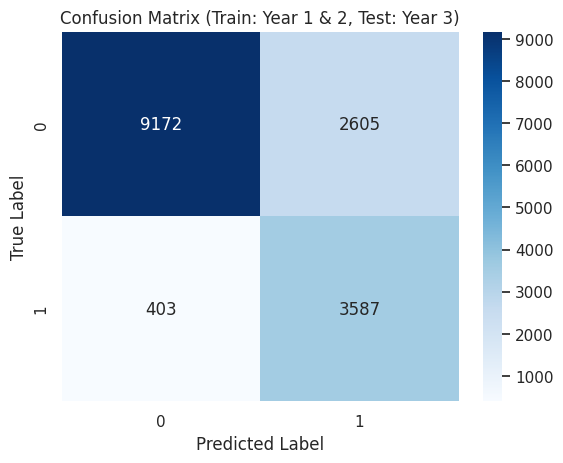


Accuracy (Train: Year 1 & 3, Test: Year 2): 0.6753974845752254
Classification Report for (Train: Year 1 & 3, Test: Year 2):
               precision    recall  f1-score   support

           0       0.53      0.96      0.69     12411
           1       0.96      0.51      0.66     21301

    accuracy                           0.68     33712
   macro avg       0.75      0.74      0.68     33712
weighted avg       0.80      0.68      0.67     33712



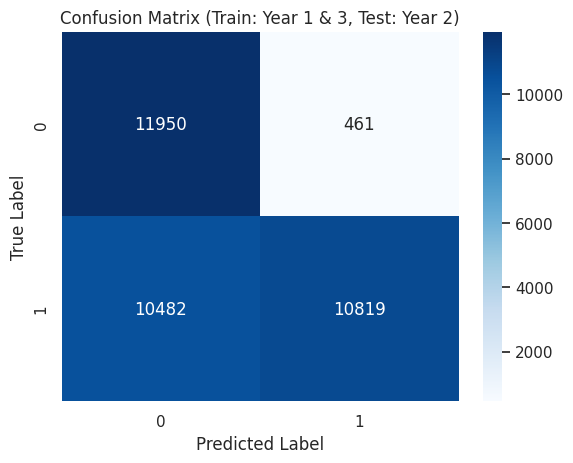


Accuracy (Train: Year 2 & 3, Test: Year 1): 0.865966116234184
Classification Report for (Train: Year 2 & 3, Test: Year 1):
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2883
           1       0.81      0.85      0.83      1780

    accuracy                           0.87      4663
   macro avg       0.86      0.86      0.86      4663
weighted avg       0.87      0.87      0.87      4663



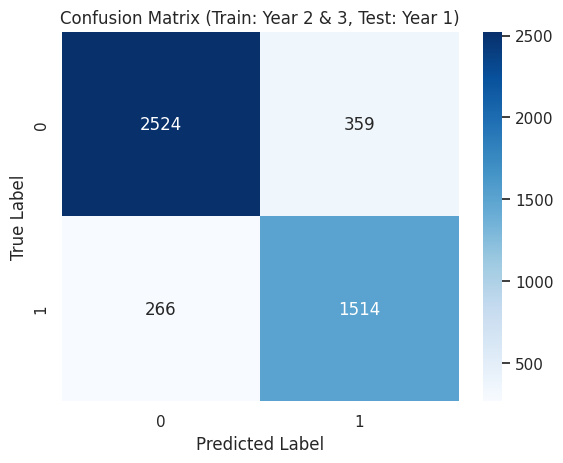


Overall Metrics:
Overall Accuracy: 0.7308
Overall Precision: 0.7512
Overall Recall: 0.7308
Overall F1-Score: 0.7252


In [143]:
cross_validation_report(smote_scaled, svm_model)